# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [22]:
# 1

cdf = pd.read_csv("./data/college_completion.csv", low_memory=False)

In [23]:
# 2

print(cdf.shape) # 3798 rows, 63 columns
print(cdf.columns) # list of variables
cdf.head()

(3798, 63)
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [24]:
# 3

pd.crosstab(cdf["control"], cdf["level"])

# the general trend is that the most common type of colleges are 4-year private non-profit institutions, and the next most common type are public 2-year institutions. The least common is 2-year private non-profit colleges. The majority of colleges are also 4-year institutions.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


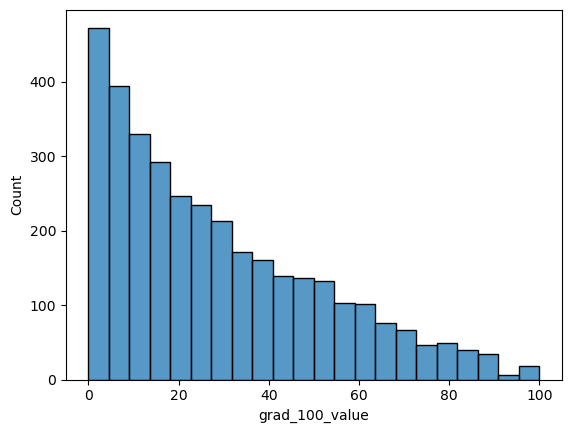

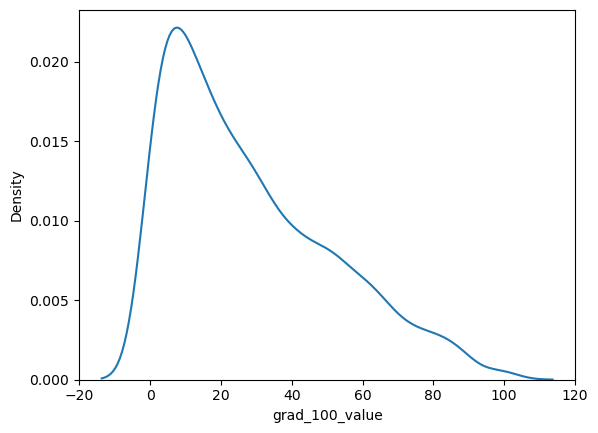

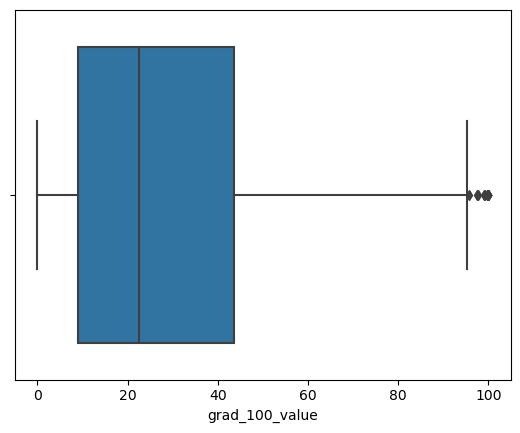

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [25]:
# 4

sns.histplot(data=cdf, x="grad_100_value")
plt.show()
sns.kdeplot(data=cdf, x="grad_100_value")
plt.show()
sns.boxplot(data=cdf, x="grad_100_value")
plt.show()
cdf["grad_100_value"].describe()

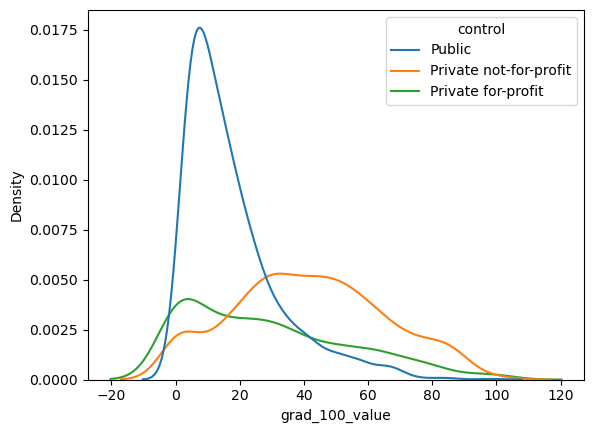

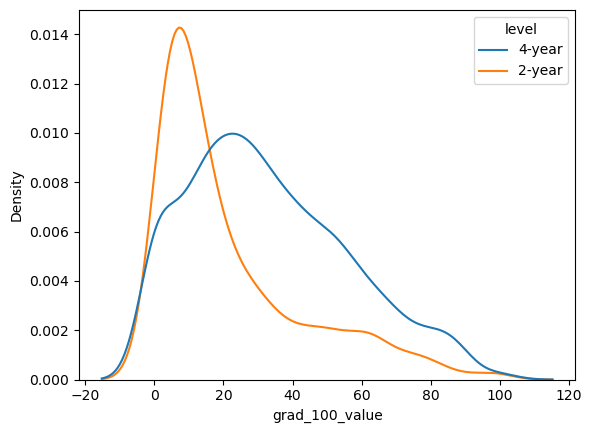

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [26]:
# 5

sns.kdeplot(data=cdf, x="grad_100_value", hue="control")
plt.show()
sns.kdeplot(data=cdf, x="grad_100_value", hue="level")
plt.show()
display(cdf[["control", "grad_100_value"]].groupby("control").describe())
display(cdf[["level", "grad_100_value"]].groupby("level").describe())

# private non-profit institutions have the highest average graduation rate compared to private for-profit and public schools, 4-year institutions of any kind have a higher average graduation rate than 2-year institutions. These trends can also be seen through the kernel desity plots where these curves are less right skewed, meaning that the average value will be higher.

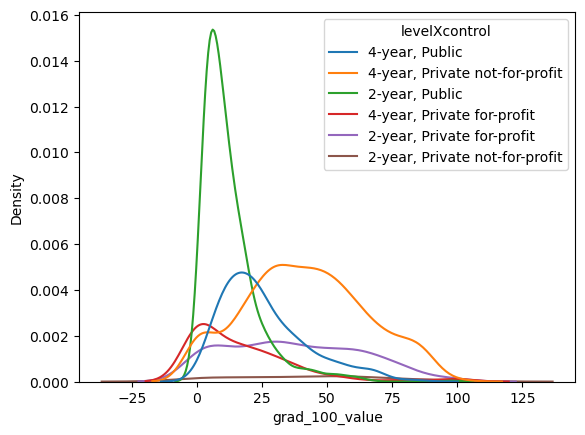

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

In [27]:
# 6

cdf["levelXcontrol"] = cdf["level"] + ", " + cdf["control"]
sns.kdeplot(data=cdf, x="grad_100_value", hue="levelXcontrol")
plt.show()

# 4-year private non-profit, 2-year private non-profit, and 2-year private for-profit colleges appear to have the best average graduation rates because they are the least skewed to the right. 2-year public institutions have the lowest graduation rate because it is the most heavily skewed to the right. This is also confirmed by the statistical description generated below. Since private for-profit colleges and 2-year colleges both perform the worst in their perspective categories of control and level, it is difficult to tell that 2-year private for-profit colleges have graduation rates that are relatively high compared to other colleges if just looking at level or control but not both.

cdf[["level", "control", "grad_100_value"]].groupby(["level", "control"]).describe()

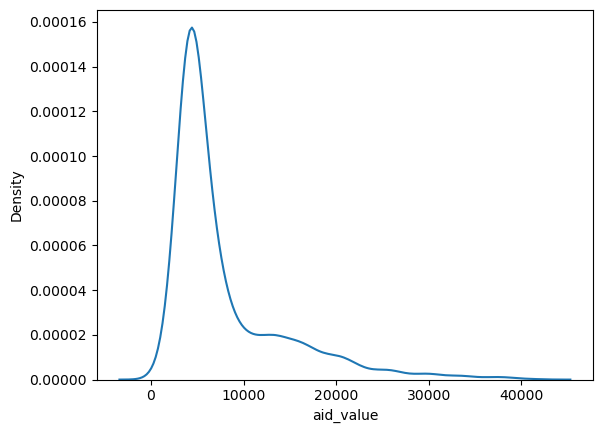

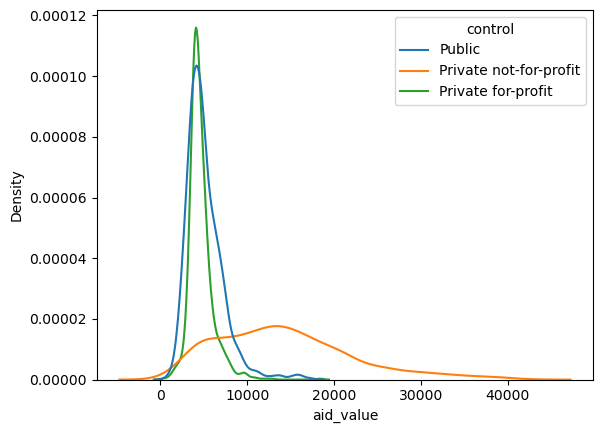

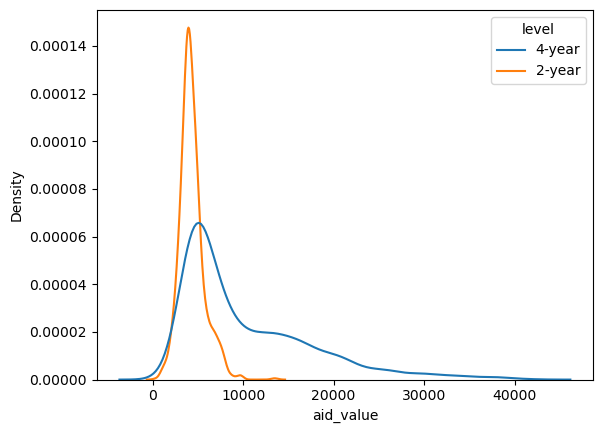

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [28]:
# 7

sns.kdeplot(data=cdf, x="aid_value")
plt.show()
sns.kdeplot(data=cdf, x="aid_value", hue="control")
plt.show()
sns.kdeplot(data=cdf, x="aid_value", hue="level")
plt.show()
display(cdf[["control", "aid_value"]].groupby("control").describe())
display(cdf[["level", "aid_value"]].groupby("level").describe())

# the graph has a major peak near the 5000 range due to both public and private for-profit colleges having similar peaks. A second, very small peak happens around the 12000 range happens due to private non-profit colleges, as these colleges tend to give the most aid on average. This also explains the shapes of the level plot, as 2-year colleges rarely are private non-profit, which thus makes the curve look similar to the public and private for-profit curves. The 4-year curve has a less abrupt peak compared to the overal plot for aid because it has a large number of private non-profit colleges.


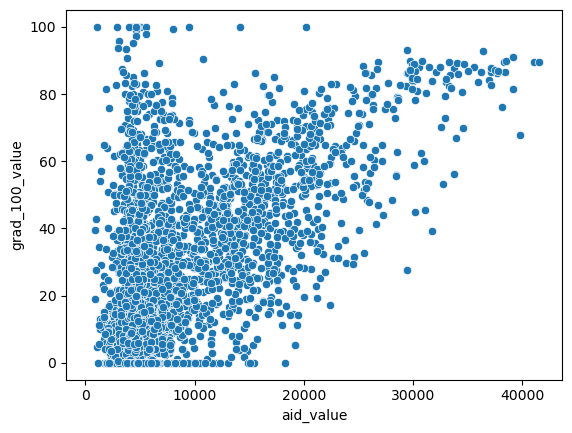

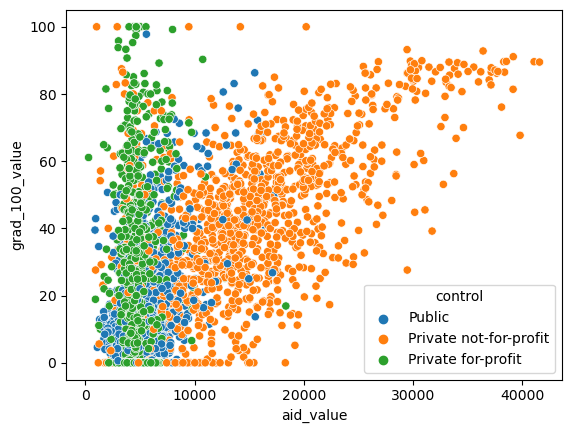

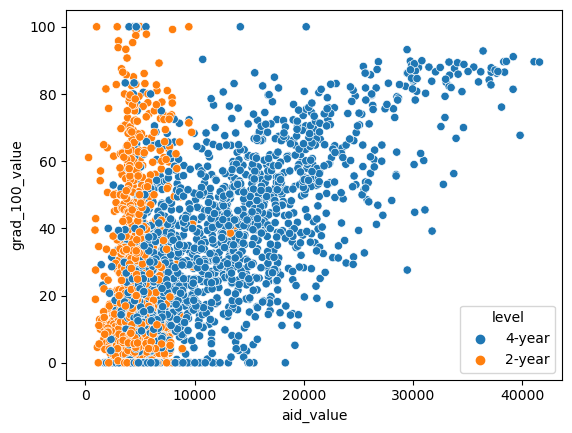

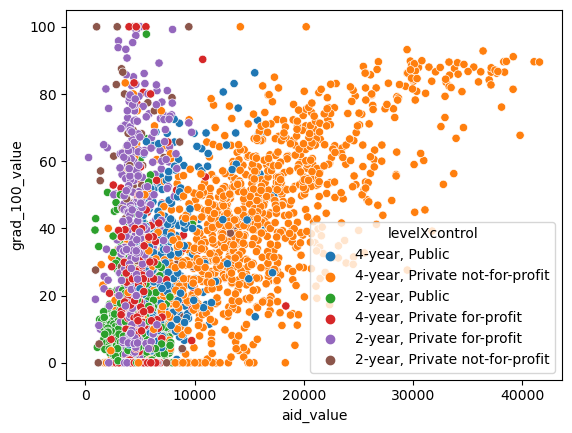

In [29]:
# 8

sns.scatterplot(data=cdf, x="aid_value", y="grad_100_value")
plt.show()

# there seems to be a subset of values with a small aid range but a very large graduation rate range, showing low correlation between these two variables for this subset, and another subset with a strong positive correlation between aid values and graduation rates.

sns.scatterplot(data=cdf, x="aid_value", y="grad_100_value", hue="control")
plt.show()
sns.scatterplot(data=cdf, x="aid_value", y="grad_100_value", hue="level")
plt.show()
sns.scatterplot(data=cdf, x="aid_value", y="grad_100_value", hue="levelXcontrol")
plt.show()

# the subset with a positive correlation between aid value and graduation rates seems to be mainly from 4-year private non-profit colleges, with all other types of colleges providing lower aid with varying graduation rates. This is consistent with the conjectures about kernel density shapes in the previous question.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [30]:
# 1

adf = pd.read_csv("./data/airbnb_hw.csv")
p = adf["Price"]
p.str.replace(",", "")
p = pd.to_numeric(p, errors="coerce")
adf["Price"] = p

# cleaning done according to wrangling assignment

In [31]:
# 2

print(adf.shape) # 30478 rows, 13 columns
print(adf.columns) # list of variables
adf.head()

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


In [32]:
# 3

pd.crosstab(adf["Property Type"], adf["Room Type"])

# many properties are "exotic" and uncommon, and so they have single digit values for multiple roome types. Ignoring these, the top three most popular properties in order are Apartments, Houses, and then Lofts. Out of these three, only Houses are more likely to be rented out by private room rather than the entire property.

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


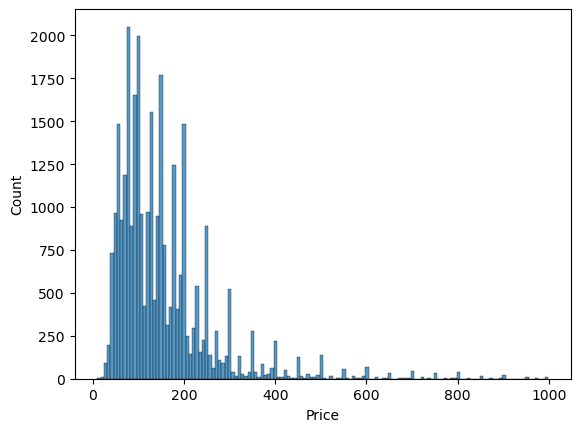

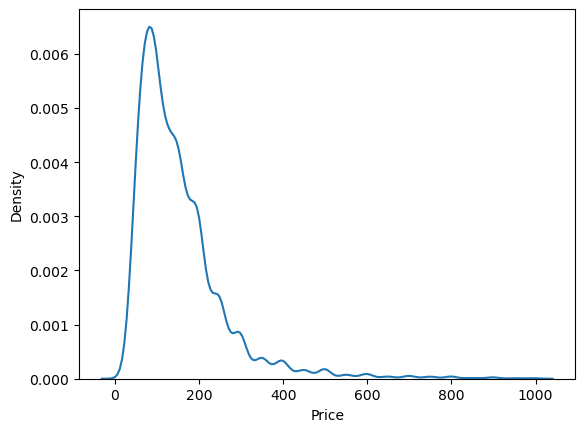

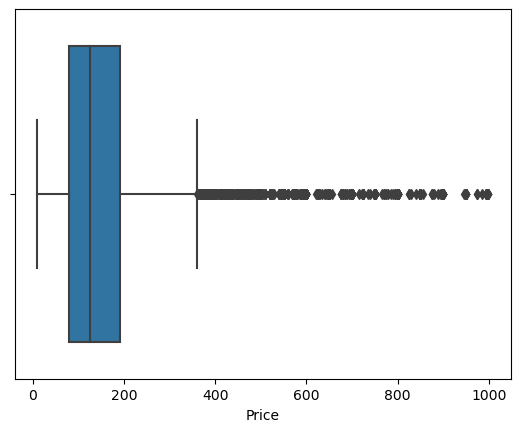

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


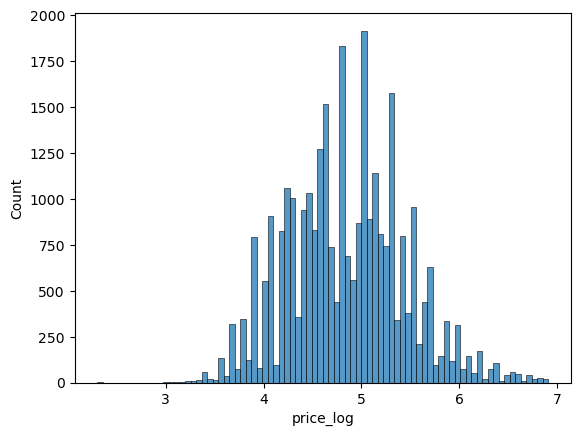

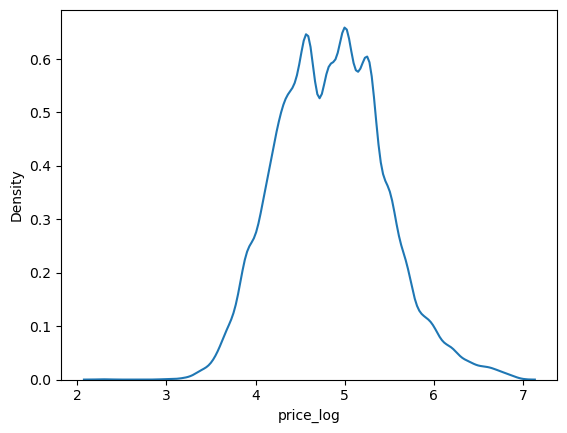

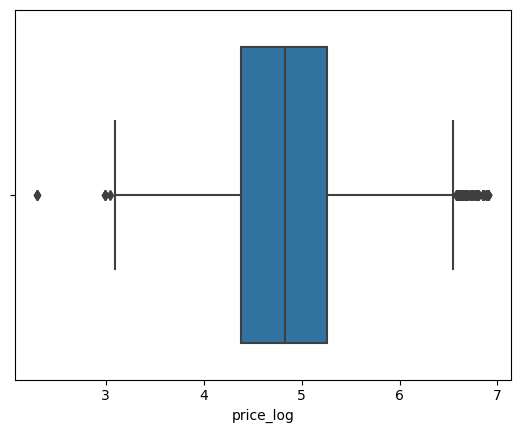

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64


In [33]:
# 4

sns.histplot(data=adf, x="Price")
plt.show()
sns.kdeplot(data=adf, x="Price")
plt.show()
sns.boxplot(data=adf, x="Price")
plt.show()
print(adf["Price"].describe())

adf["price_log"] = np.log(adf["Price"])
sns.histplot(data=adf, x="price_log")
plt.show()
sns.kdeplot(data=adf, x="price_log")
plt.show()
sns.boxplot(data=adf, x="price_log")
plt.show()
print(adf["price_log"].describe())

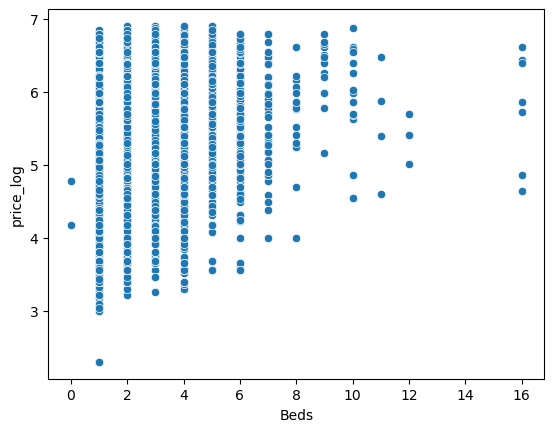

Price                                                             
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000  236.798613  100.0  190.00  289.5  431.75  650.0
12.0      3.0  225.000000   75.000000  150.0  187.50  225.0  262.50  300.0
16.0      8.0  402.250000  235.093143  104.0  264.25  350.0  606.25  750.0

In [34]:
# 5

sns.scatterplot(data=adf, x="Beds", y="price_log")
plt.show()
adf[["Beds", "Price"]].groupby("Beds").describe()

# generally, as beds increase so does the average price. The data deviates from this pattern for bed numbers 6-16. The pattern for standard deviation follows that of the average price, but deviates for bed numbers 8-16. The deviations for both of these statistics can be explained by the presence of huge outliers as seen in the max column.

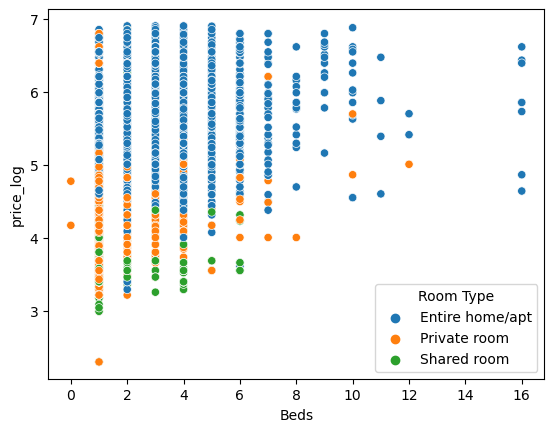

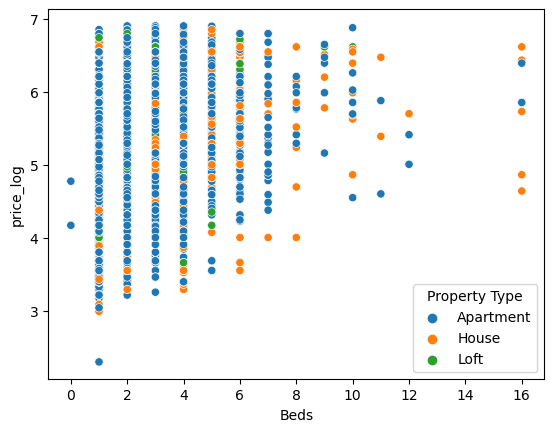

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  16855.0  204.061525  116.531136  10.0  135.0  175.0  239.0   
Private room     12599.0   90.663227   47.914195  10.0   65.0   80.0  100.0   
Shared room        843.0   76.553974   65.756210  10.0   45.0   60.0   85.0   

                        
                   max  
Room Type               
Entire home/apt  999.0  
Private room     999.0  
Shared room      950.0

Price                                                     \
                 count        mean         std   min   25%    50%     75%   
Property Type                                                               
Apartment      26975.0  153.863170  104.112805  10.0  85.0  129.0  195.00   
House           2060.0  131.598058  127.421195  10.0  60.0   84.0  150.00   
Loft             738.0  193.166667  169.094068  30.0  80.0  135.0  225.75   

                      
                 max  
Property Type         
Apartment      999.0  
House          997.0  
Loft           985.0

In [35]:
# 6

sns.scatterplot(data=adf, x="Beds", y="price_log", hue="Room Type")
plt.show()
adf_top = adf.loc[adf["Property Type"].isin(["Apartment", "House", "Loft"])] # only selecting the top three property types, otherwise hue colors are too dificult to distinguish, also makes plot less noisy
sns.scatterplot(data=adf_top, x="Beds", y="price_log", hue="Property Type")
plt.show()
display(adf[["Room Type", "Price"]].groupby("Room Type").describe())
display(adf_top[["Property Type", "Price"]].groupby("Property Type").describe())

# typically we see that renting out the entire property will cost more than just a room with shared rooms being cheaper than priavte rooms regardless of the number of beds. Apartments have a wide range of prices, while Houses seem to be more concentrated on the lower end of prices and Lofts seem to be more concentrated on the higher end of prices. Looking at the description tables, we see that this pattern holds true for both the mean and the median statistics. Even though the mean and median show the same relationship between types, since the maximum values are so far away from the rest of the quartile values, it is more accurate to use the median as the measure of central tendency. Usually a higher standard deviation corelates to a higher mean with the exception of Apartments, which have a lower standard deviation than Houses even though they have a higher mean. This may simply be due to the overwhelming popularity of apartment properties which generates large amounts of data to lower standard deviation.

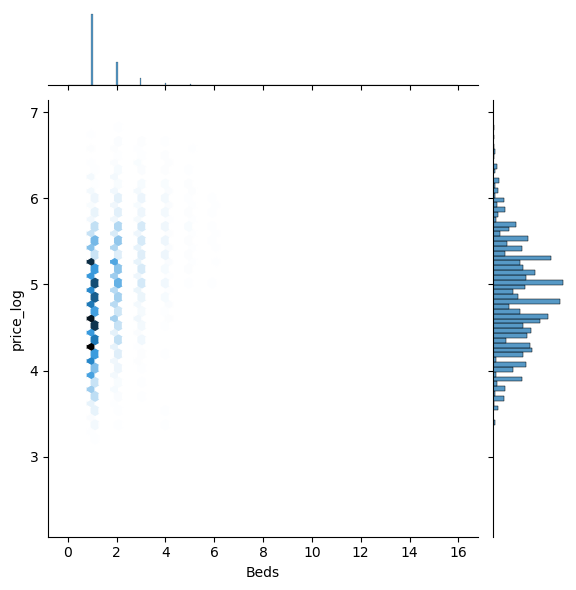

In [36]:
# 7

sns.jointplot(data=adf, x="Beds", y="price_log", kind="hex")

# most properties have 1 or 2 beds to rent and a few with 3 or 4 beds. Most properties are also within 3.75 to 6.25 log values, which is between $40 to $500, so our statistics before were heavily influenced by outliers.

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.